In [1]:
import pandas as pd

In [2]:
#files to load
natural_gas_file="natural_gas_data.csv"
weather_state_file="ave_temp_by_state.csv"

In [3]:
nat_gas_csv= pd.read_csv(natural_gas_file)
state_weather_csv= pd.read_csv(weather_state_file)

In [4]:
gas_df = pd.DataFrame(nat_gas_csv)
gas_df.head()

,Unnamed: 0,Date,State,Natural Gas Consumption (MMcf)
0,0,Jan-10,Alabama,9202.647
1,1,Feb-10,Alabama,7762.261
2,2,Mar-10,Alabama,6612.051
3,3,Apr-10,Alabama,2987.217
4,4,May-10,Alabama,1142.784


In [5]:
weather_twenty_years= pd.DataFrame(state_weather_csv)
weather_twenty_years.head()

,Unnamed: 0,Date,State,Average Temperature,Anomaly
0,0,Jan-00,Alabama,46.5,1.6
1,1,Feb-00,Alabama,52.3,2.5
2,2,Mar-00,Alabama,58.9,2.7
3,3,Apr-00,Alabama,60.1,-3.8
4,4,May-00,Alabama,74.0,2.4


In [6]:
merge_df= pd.merge(weather_twenty_years,gas_df, how ="left", on =["Date","State"])
merge_df

,Unnamed: 0_x,Date,State,Average Temperature,Anomaly,Unnamed: 0_y,Natural Gas Consumption (MMcf)
0,0,Jan-00,Alabama,46.5,1.6,NaN,NaN
1,1,Feb-00,Alabama,52.3,2.5,NaN,NaN
2,2,Mar-00,Alabama,58.9,2.7,NaN,NaN
3,3,Apr-00,Alabama,60.1,-3.8,NaN,NaN
4,4,May-00,Alabama,74.0,2.4,NaN,NaN
...,...,...,...,...,...,...,...
11804,11804,Sep-19,Wyoming,56.7,0.1,6716.0,189.987
11805,11805,Oct-19,Wyoming,34.2,-8.9,6717.0,589.805
11806,11806,Nov-19,Wyoming,30.2,-0.9,6718.0,1847.274
11807,11807,Dec-19,Wyoming,23.0,1.4,6719.0,2073.947


In [7]:
null_drop = merge_df.dropna(how='any')
null_drop

,Unnamed: 0_x,Date,State,Average Temperature,Anomaly,Unnamed: 0_y,Natural Gas Consumption (MMcf)
120,120,Jan-10,Alabama,40.0,-4.9,0.0,9202.647
121,121,Feb-10,Alabama,40.6,-9.2,1.0,7762.261
122,122,Mar-10,Alabama,51.2,-5.0,2.0,6612.051
123,123,Apr-10,Alabama,64.2,0.3,3.0,2987.217
124,124,May-10,Alabama,73.3,1.7,4.0,1142.784
...,...,...,...,...,...,...,...
11804,11804,Sep-19,Wyoming,56.7,0.1,6716.0,189.987
11805,11805,Oct-19,Wyoming,34.2,-8.9,6717.0,589.805
11806,11806,Nov-19,Wyoming,30.2,-0.9,6718.0,1847.274
11807,11807,Dec-19,Wyoming,23.0,1.4,6719.0,2073.947


In [8]:
clean_merge= null_drop.drop(columns=['Unnamed: 0_x',"Unnamed: 0_y"])
clean_merge

,Date,State,Average Temperature,Anomaly,Natural Gas Consumption (MMcf)
120,Jan-10,Alabama,40.0,-4.9,9202.647
121,Feb-10,Alabama,40.6,-9.2,7762.261
122,Mar-10,Alabama,51.2,-5.0,6612.051
123,Apr-10,Alabama,64.2,0.3,2987.217
124,May-10,Alabama,73.3,1.7,1142.784
...,...,...,...,...,...
11804,Sep-19,Wyoming,56.7,0.1,189.987
11805,Oct-19,Wyoming,34.2,-8.9,589.805
11806,Nov-19,Wyoming,30.2,-0.9,1847.274
11807,Dec-19,Wyoming,23.0,1.4,2073.947


In [9]:
#Dropping states that use less than 5000 MMcf. Considering these low use states as outliers 

state_drop= clean_merge[clean_merge['Natural Gas Consumption (MMcf)']<=5000].index
gas_states=clean_merge.drop(state_drop)
gas_states

,Date,State,Average Temperature,Anomaly,Natural Gas Consumption (MMcf)
120,Jan-10,Alabama,40.0,-4.9,9202.647
121,Feb-10,Alabama,40.6,-9.2,7762.261
122,Mar-10,Alabama,51.2,-5.0,6612.051
131,Dec-10,Alabama,40.3,-9.0,7970.435
132,Jan-11,Alabama,41.1,-3.8,9951.178
...,...,...,...,...,...
11559,May-19,Wisconsin,51.8,-4.4,7050.223
11564,Oct-19,Wisconsin,45.0,-2.4,9003.976
11565,Nov-19,Wisconsin,28.2,-4.8,19033.545
11566,Dec-19,Wisconsin,23.5,1.4,21240.594


In [10]:
state_group= gas_states.groupby(clean_merge['State'])


In [11]:
state_ave = state_group['Natural Gas Consumption (MMcf)'].mean()


In [12]:
import numpy as np
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='State'>

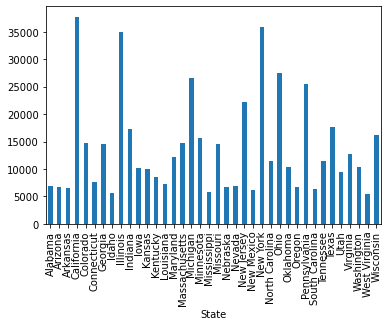

In [13]:
state_ave.plot(kind='bar', y='Natural Gas Consumption (MMcf)')

In [14]:
# Grouping States by Standard Federal Regions 

In [15]:
Region_I= gas_states.loc[(gas_states['State']== 'Connecticut') | (gas_states['State']== 'Massachusetts')]

In [16]:
Region_II= gas_states.loc[(gas_states['State']== 'New Jersey') | (gas_states['State']== 'New York')]

In [17]:
Region_III= gas_states.loc[(gas_states['State']== 'Maryland') | (gas_states['State']== 'Pennsylvania') | (gas_states['State']== 'Virginia') | (gas_states['State']== 'West Virginia')]

In [18]:
Region_IV= gas_states.loc[(gas_states['State']== 'Alabama') | (gas_states['State']== 'Georgia') | (gas_states['State']== 'Kentucky') | (gas_states['State']== 'Mississippi') |(gas_states['State']== 'North Carolina') |(gas_states['State']== 'South Carolina') | (gas_states['State']=='Tennessee')]

In [19]:
Region_V = gas_states.loc[(gas_states['State']== 'Illinois') | (gas_states['State']== 'Indiana') | (gas_states['State']=='Michigan') | (gas_states['State']=='Minnesota')| (gas_states['State']=='Ohio') |( gas_states['State']== 'Wisconsin')]

In [20]:
Region_VI=gas_states.loc[(gas_states['State']== 'Arkansas') | (gas_states['State']== 'Louisiana') | (gas_states['State']== 'New Mexico') | (gas_states['State']=='Oklahoma') |(gas_states['State']=='Texas')]

In [21]:
Region_VII=gas_states.loc[(gas_states['State']== 'Iowa') | (gas_states['State']== 'Kansas') |(gas_states['State']=='Missouri')]

In [22]:
Region_VIII=gas_states.loc[(gas_states['State']== 'Colorado') | (gas_states['State']== 'Utah')]

In [23]:
Region_IX=gas_states.loc[(gas_states['State']== 'Arizona') | (gas_states['State']== 'California')]

In [24]:
Region_X= gas_states.loc[(gas_states['State']== 'Idaho') | (gas_states['State']== 'Oregon') | (gas_states['State']=='Washington')]

In [25]:
reg_I_gas= Region_I['Natural Gas Consumption (MMcf)'].mean()
print(reg_I_gas)

12245.1342051282


In [26]:
reg_II_gas= Region_II['Natural Gas Consumption (MMcf)'].mean()
print(reg_II_gas)

29755.519713636375


In [27]:

reg_II_gas= Region_II['Natural Gas Consumption (MMcf)'].mean()
reg_III_gas= Region_III['Natural Gas Consumption (MMcf)'].mean()
reg_IV_gas= Region_IV['Natural Gas Consumption (MMcf)'].mean()
reg_V_gas= Region_V['Natural Gas Consumption (MMcf)'].mean()
reg_VI_gas= Region_VI['Natural Gas Consumption (MMcf)'].mean()
reg_VII_gas= Region_VII['Natural Gas Consumption (MMcf)'].mean()
reg_VIII_gas= Region_VIII['Natural Gas Consumption (MMcf)'].mean()
reg_IX_gas= Region_IX['Natural Gas Consumption (MMcf)'].mean()
reg_X_gas= Region_X['Natural Gas Consumption (MMcf)'].mean()

In [68]:
reg_name=('1','2','3','4','5','6','7','8','9','10')
reg_CCmf=([reg_I_gas,reg_II_gas,reg_III_gas,reg_IV_gas,reg_V_gas,reg_VI_gas,reg_VII_gas,reg_VIII_gas,reg_IX_gas,reg_X_gas])

In [70]:
rgtest_df=pd.DataFrame({'Region': reg_name, 'Ave MMcf': reg_CCmf})
rgtest_df

,Region,Ave MMcf
0,1,12245.134205
1,2,29755.519714
2,3,17591.317564
3,4,10781.670837
4,5,24545.681680
5,6,12610.595440
6,7,11773.560352
7,8,12660.356955
8,9,32088.449081
9,10,8753.327469


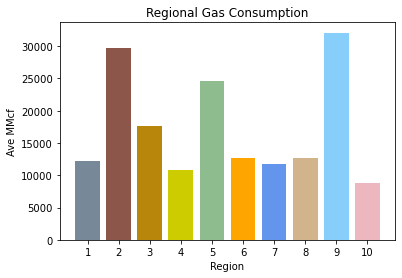

In [78]:
plt.bar(reg_name, reg_CCmf, color=["lightslategrey","tab:brown","darkgoldenrod","#CCCC00","darkseagreen","orange","cornflowerblue",'tan','lightskyblue','#ecb7bf'])
plt.ylabel('Ave MMcf')
plt.xlabel('Region')
plt.title("Regional Gas Consumption")
plt.show()

Text(0, 0.5, 'MMcf')

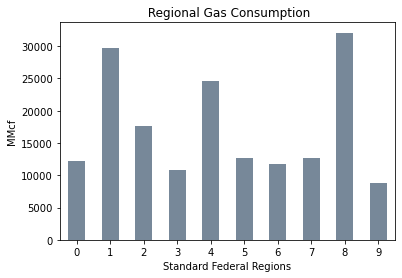

In [75]:
# matplot worked better than pandas 

# reg_graph=rgtest_df.plot.bar(legend=False,title =" Regional Gas Consumption", rot=0, color=["lightslategrey","tab:brown","darkgoldenrod","#CCCC00","darkseasgreen","orange","cornflowerblue",'tan','lightskyblue','#ecb7bf'])
# reg_graph.set_xlabel("Standard Federal Regions")
# reg_graph.set_ylabel("MMcf")



In [28]:
# region_data= pd.DataFrame({'I': [reg_I_gas],
#                'II': [reg_II_gas],
#                'III': [reg_III_gas],
#                'IV': [reg_IV_gas],
#                'V': [reg_V_gas],
#                'VI': [reg_VI_gas],
#                'VII': [reg_VII_gas],
#                'VIII': [reg_VIII_gas],
#                'IX': [reg_IX_gas],
#                'X': [reg_X_gas]})

In [29]:
# region_data.head()

,I,II,III,IV,V,VI,VII,VIII,IX,X
0,12245.134205,29755.519714,17591.317564,10781.670837,24545.68168,12610.59544,11773.560352,12660.356955,32088.449081,8753.327469


In [30]:
# T_region_data=region_data.T
# T_region_data

,0
I,12245.134205
II,29755.519714
III,17591.317564
IV,10781.670837
V,24545.681680
VI,12610.595440
VII,11773.560352
VIII,12660.356955
IX,32088.449081
X,8753.327469


In [79]:
# region_graph=T_region_data.plot.bar(title =" Regional Gas Consumption", rot=0, color=["lightslategrey","tab:brown","darkgoldenrod","#CCCC00","darkseasgreen","orange","cornflowerblue",'tan','lightskyblue','#ecb7bf'])
# region_graph.set_xlabel("Standard Federal Regions")
# region_graph.set_ylabel("MMcf")



In [80]:
#Region IX: Arizona, California, Hawaii, Nevada, American Samoa, Guam, Northern Mariana Islands most consumption
    #Only have Arizona and California in our set. 
#Region X: Alaska, Idaho, Oregon, Washington least consumption
    #Alaska not included in this set. 

In [81]:
# looking at gas consumption by season

In [82]:
gas_states[['Month', 'Year']]= gas_states.Date.str.split("-",expand=True)
gas_states

,Date,State,Average Temperature,Anomaly,Natural Gas Consumption (MMcf),Month,Year
120,Jan-10,Alabama,40.0,-4.9,9202.647,Jan,10
121,Feb-10,Alabama,40.6,-9.2,7762.261,Feb,10
122,Mar-10,Alabama,51.2,-5.0,6612.051,Mar,10
131,Dec-10,Alabama,40.3,-9.0,7970.435,Dec,10
132,Jan-11,Alabama,41.1,-3.8,9951.178,Jan,11
...,...,...,...,...,...,...,...
11559,May-19,Wisconsin,51.8,-4.4,7050.223,May,19
11564,Oct-19,Wisconsin,45.0,-2.4,9003.976,Oct,19
11565,Nov-19,Wisconsin,28.2,-4.8,19033.545,Nov,19
11566,Dec-19,Wisconsin,23.5,1.4,21240.594,Dec,19


In [83]:
spring_loc= gas_states.loc[(gas_states['Month']== 'Mar')|(gas_states['Month']== 'April')|(gas_states['Month']== 'May')]

In [84]:
summer_loc=  gas_states.loc[(gas_states['Month']== 'Jun')|(gas_states['Month']== 'Jul')|(gas_states['Month']== 'Aug')]

In [85]:
fall_loc=  gas_states.loc[(gas_states['Month']== 'Sep')|(gas_states['Month']== 'Oct')|(gas_states['Month']== 'Nov')]

In [86]:
winter_loc=  gas_states.loc[(gas_states['Month']== 'Dec')|(gas_states['Month']== 'Jan')|(gas_states['Month']== 'Feb')]

In [87]:
spring = spring_loc['Natural Gas Consumption (MMcf)'].mean()
summer = summer_loc['Natural Gas Consumption (MMcf)'].mean()
fall = fall_loc['Natural Gas Consumption (MMcf)'].mean()
winter = winter_loc['Natural Gas Consumption (MMcf)'].mean()

In [88]:
season_name=("Spring","Summer","Fall","Winter")
season_MMcf=([spring, summer, fall, winter])


In [89]:
season_df= pd.DataFrame({"Season":season_name,"Ave MMcF":season_MMcf})
season_df

,Season,Ave MMcF
0,Spring,17439.578795
1,Summer,9639.897877
2,Fall,14312.825116
3,Winter,22429.310633


[Text(0, 0, 'Spring'),
 Text(1, 0, 'Summer'),
 Text(2, 0, 'Fall'),
 Text(3, 0, 'Winter')]

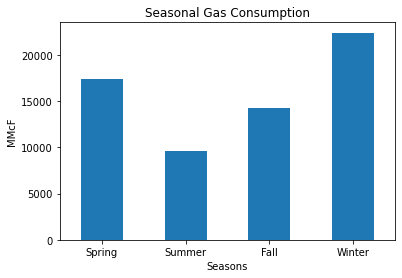

In [90]:
season_bar= season_df.plot.bar(legend=False, title= "Seasonal Gas Consumption",rot=0)
season_bar.set_xlabel("Seasons")
season_bar.set_ylabel("MMcF")
season_bar.set_xticklabels(season_name)

In [91]:
#doing groubpy for boxplot

spring_box_data = spring_loc['Natural Gas Consumption (MMcf)']
summer_box_data = summer_loc['Natural Gas Consumption (MMcf)']
fall_box_data = fall_loc['Natural Gas Consumption (MMcf)']
winter_box_data = winter_loc['Natural Gas Consumption (MMcf)']

In [92]:
ss_box_df= pd.DataFrame({"Spring":spring_box_data, "Summer":summer_box_data, "Fall": fall_box_data, "Winter": winter_box_data})
ss_box_df.fillna(" ")

,Spring,Summer,Fall,Winter
120,,,,9202.65
121,,,,7762.26
122,6612.05,,,
131,,,,7970.44
132,,,,9951.18
...,...,...,...,...
11559,7050.22,,,
11564,,,9003.98,
11565,,,19033.5,
11566,,,,21240.6


Text(0, 0.5, 'MMcf')

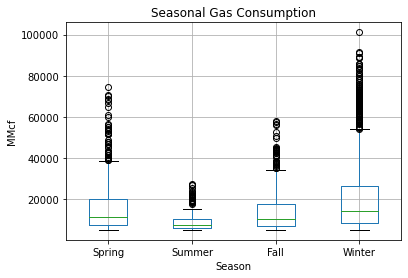

In [45]:
season_box=ss_box_df.boxplot()
season_box.set_title("Seasonal Gas Consumption")
season_box.set_xlabel("Season")
season_box.set_ylabel("MMcf")

In [46]:
# gas_states.loc[original_df['last_name'] == 'Hudson',['Best']] = 'nick'



In [47]:
#bottom states ave
ct1=gas_states.loc[(gas_states['State']== 'Connecticut')]['Natural Gas Consumption (MMcf)'].mean()
nj1=gas_states.loc[(gas_states['State']== 'New Jersey')]['Natural Gas Consumption (MMcf)'].mean()
md1=gas_states.loc[(gas_states['State']== 'Maryland')]['Natural Gas Consumption (MMcf)'].mean()
ab1=gas_states.loc[(gas_states['State']== 'Alabama')]['Natural Gas Consumption (MMcf)'].mean()
il1=gas_states.loc[(gas_states['State']== 'Illinois')]['Natural Gas Consumption (MMcf)'].mean()
ak1=gas_states.loc[(gas_states['State']== 'Arkansas')]['Natural Gas Consumption (MMcf)'].mean()
ia1=gas_states.loc[(gas_states['State']== 'Iowa')]['Natural Gas Consumption (MMcf)'].mean()
co1=gas_states.loc[(gas_states['State']== 'Colorado')]['Natural Gas Consumption (MMcf)'].mean()
az1=gas_states.loc[(gas_states['State']== 'Arizona')]['Natural Gas Consumption (MMcf)'].mean()
id1=gas_states.loc[(gas_states['State']== 'Idaho')]['Natural Gas Consumption (MMcf)'].mean()

In [48]:
#2state
ma2=gas_states.loc[(gas_states['State']== 'Massachusetts')]['Natural Gas Consumption (MMcf)'].mean()
ny2=gas_states.loc[(gas_states['State']== 'New York')]['Natural Gas Consumption (MMcf)'].mean()
pn2=gas_states.loc[(gas_states['State']== 'Pennsylvania')]['Natural Gas Consumption (MMcf)'].mean()
ga2=gas_states.loc[(gas_states['State']== 'Georgia')]['Natural Gas Consumption (MMcf)'].mean()
in2=gas_states.loc[(gas_states['State']== 'Indiana')]['Natural Gas Consumption (MMcf)'].mean()
la2=gas_states.loc[(gas_states['State']== 'Louisiana')]['Natural Gas Consumption (MMcf)'].mean()
ks2=gas_states.loc[(gas_states['State']== 'Kansas')]['Natural Gas Consumption (MMcf)'].mean()
ut2=gas_states.loc[(gas_states['State']== 'Utah')]['Natural Gas Consumption (MMcf)'].mean()
ca2=gas_states.loc[(gas_states['State']== 'California')]['Natural Gas Consumption (MMcf)'].mean()
or2=gas_states.loc[(gas_states['State']== 'Oregon')]['Natural Gas Consumption (MMcf)'].mean()

In [49]:
#3rd state
r1=0
r2=0
va3=gas_states.loc[(gas_states['State']== 'Virginia')]['Natural Gas Consumption (MMcf)'].mean()
ky3=gas_states.loc[(gas_states['State']== 'Kentucky')]['Natural Gas Consumption (MMcf)'].mean()
mi3=gas_states.loc[(gas_states['State']== 'Michigan')]['Natural Gas Consumption (MMcf)'].mean()
nm3=gas_states.loc[(gas_states['State']== 'New Mexico')]['Natural Gas Consumption (MMcf)'].mean()
mo3=gas_states.loc[(gas_states['State']== 'Missouri')]['Natural Gas Consumption (MMcf)'].mean()
r8=0
r9=0
wa3=gas_states.loc[(gas_states['State']== 'Washington')]['Natural Gas Consumption (MMcf)'].mean()

In [50]:
r1=0
r2=0
r3=0
r4=0
r5=0
r6=0
r7=0
r8=0
r9=0
r10=0 

In [51]:
#region 4 
#4state
ms4=gas_states.loc[(gas_states['State']== 'Mississippi')]['Natural Gas Consumption (MMcf)'].mean()
nc5=gas_states.loc[(gas_states['State']== 'North Carolina')]['Natural Gas Consumption (MMcf)'].mean() 
sc6=gas_states.loc[(gas_states['State']== 'South Carolina')]['Natural Gas Consumption (MMcf)'].mean()
tn7=gas_states.loc[(gas_states['State']=='Tennessee')]['Natural Gas Consumption (MMcf)'].mean()

In [52]:
#region 5 
mi4= gas_states.loc[(gas_states['State']=='Minnesota')]['Natural Gas Consumption (MMcf)'].mean()
oh5=gas_states.loc[(gas_states['State']=='Ohio')]['Natural Gas Consumption (MMcf)'].mean()
wi6= gas_states.loc[(gas_states['State']== 'Wisconsin')]['Natural Gas Consumption (MMcf)'].mean()

In [53]:
#region 6 
ok4=gas_states.loc[(gas_states['State']=='Oklahoma')]['Natural Gas Consumption (MMcf)'].mean()
tx5=gas_states.loc[(gas_states['State']=='Texas')]['Natural Gas Consumption (MMcf)'].mean()

In [54]:
#Attempting a stacked bar chart for regional consumption 

rg_1=[ct1,ma2,r3,r4,r5,r6,r7]
rg_2=[nj1,ny2,r3,r4,r5,r6,r7]
rg_3=[md1,pn2,va3,r4,r5,r6,r7]
rg_4=[ab1,ga2,ky3,ms4,nc5,sc6,tn7]
rg_5=[il1,in2,mi3,mi4,oh5,wi6,r7]
rg_6=[ak1,la2,nm3,ok4,tx5,r6,r7]
rg_7=[ia1,ks2,mo3,r4,r5,r6,r7]
rg_8=[co1,ut2,r3,r4,r5,r6,r7]
rg_9=[az1,ca2,r3,r4,r5,r6,r7]
rg_10=[id1,or2,wa3,r4,r5,r6,r7]

In [55]:
import numpy as np
import matplotlib.pyplot as plt


In [56]:
plot_data=np.array([[ct1,nj1,md1,ab1,il1,ak1,ia1,co1,az1,id1],
                   [ma2,ny2,pn2,ga2,in2,la2,ks2,ut2,ca2,or2],
                   [va3,ky3,mi3,nm3,mo3,r8,r9,wa3,r1,r2],
                   [ms4,mi4,ok4,r7,r8,r9,r10,r1,r2,r3],
                   [nc5,oh5,tx5,r7,r8,r9,r10,r1,r2,r3],
                   [sc6,wi6,r6,r7,r8,r9,r10,r1,r2,r3],
                   [tn7,r5,r6,r7,r8,r9,r10,r1,r2,r3]])

In [57]:
color_list=['purple','mediumseagreen','#C34C8E','darkorange','#0073FF','gold','crimson']

In [58]:
x= np.arange(plot_data.shape[1])
for i in range(plot_data.shape[0]): 
    plt.bar(x, data[i],
           bottom=np.sum(plot_data[:i],axis=0),
           color =color_list[i % len(color_list)])

NameError: name 'data' is not defined

In [ ]:

r = [0,1,2,3,4,5,6,7,8,9]

In [ ]:
names = ['I','II','III','IV','V','VI','VII','VIII','IX',"X"]
barWidth = 1

In [ ]:

plt.bar(r, rg_1, color='purple', edgecolor='white', width=barWidth)
plt.bar(r, rg_2, bottom=rg_1, color='mediumseagreen', edgecolor='white', width=barWidth)
plt.bar(r, rg_3, bottom=rg_1+rg_2, color='#C34C8E', edgecolor='white', width=barWidth)
plt.bar(r, rg_4, bottom=rg_1+rg_2+rg_3, color='darkorange', edgecolor='white', width=barWidth)
plt.bar(r, rg_5, bottom=rg_1+rg_2+rg_3+rg_4, color='#0073FF', edgecolor='white', width=barWidth)
plt.bar(r, rg_6, bottom=rg_1+rg_2+rg_3+rg_4+rg_5, color='gold', edgecolor='white', width=barWidth)
plt.bar(r, rg_7, bottom=rg_1+rg_2+rg_3+rg_4+rg_5+rg_6, color='crimson', edgecolor='white', width=barWidth)
plt.bar(r, rg_8, bottom=rg_1+rg_2+rg_3+rg_4+rg_5+rg_6+rg_7, color='slategrey', edgecolor='white', width=barWidth)
plt.bar(r, rg_9, bottom=rg_1+rg_2+rg_3+rg_4+rg_5+rg_6+rg_7+rg_8, color='darkgreen', edgecolor='white', width=barWidth)
plt.bar(r, rg_10, bottom=rg_1+rg_2+rg_3+rg_4+rg_5+rg_6+rg_7+rg_8+rg_9, color='indigo', edgecolor='white', width=barWidth)

In [ ]:
# st_1=[ct1,nj1,md1,ab1,il1,ak1,ia1,co1,az1,id1]
# st_2=[ma2,ny2,pn2,ga2,in2,la2,ks2,ut2,ca2,or2]
# st_3=[r1,r2,va3,ky3,mi3,nm3,mo3,r8,r9,wa3]
# st_4=[r1,r2,r3,ms4,mi4,ok4,r7,r8,r9,r10]
# st_5=[r1,r2,r3,nc5,oh5,tx5,r7,r8,r9,r10]
# st_6=[r1,r2,r3,sc6,wi6,r6,r7,r8,r9,r10]
# st_7=[r1,r2,r3,tn7,r5,r6,r7,r8,r9,r10]